In [1]:
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pdb
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [2]:
from config import get_config
import argparse
from Learner import face_learner
from insight_data.data_pipe import get_val_pair
from torchvision import transforms as trans

In [3]:
conf = get_config(training=False)

In [4]:
learner = face_learner(conf, inference=True)

{'data_path': PosixPath('insight_data'), 'work_path': PosixPath('work_space'), 'model_path': PosixPath('work_space/models'), 'log_path': PosixPath('work_space/log'), 'save_path': PosixPath('/home/create/jing/jing_vision/face/insightface/work_space/save'), 'input_size': [112, 112], 'embedding_size': 512, 'use_mobilfacenet': True, 'net_depth': 50, 'drop_ratio': 0.6, 'net_mode': 'ir_se', 'device': device(type='cuda', index=0), 'test_transform': Compose(
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
), 'data_mode': 'emore', 'vgg_folder': PosixPath('insight_data/faces_vgg_112x112'), 'ms1m_folder': PosixPath('insight_data/faces_ms1m_112x112'), 'emore_folder': PosixPath('/Data/jing/face/faces_emore'), 'batch_size': 100, 'facebank_path': PosixPath('insight_data/facebank'), 'threshold': 1.5, 'face_limit': 10, 'min_face_size': 30}
MobileFaceNet model generated


In [3]:
import numpy as np
issame = np.load('/Data/jing/face/faces_emore/vgg2_fp_list.npy')
print(issame,issame.shape)

[1 1 1 ... 0 0 0] (5000,)


In [5]:
import bcolz
carray = bcolz.carray(rootdir = '/Data/jing/face/faces_emore/vgg2_fp', mode='r')
print(carray.shape,carray[0:2])

(10000, 3, 112, 112) [[[[-0.00392157 -0.10588235 -0.23137254 ...  0.427451    0.45098042
     0.45098042]
   [-0.05098039 -0.11372548 -0.18431371 ...  0.39607847  0.4039216
     0.39607847]
   [-0.10588235 -0.12941176 -0.1607843  ...  0.3411765   0.34901965
     0.3411765 ]
   ...
   [ 0.85882354  0.8039216   0.77254903 ...  0.32549024  0.32549024
     0.2941177 ]
   [ 0.8901961   0.8509804   0.8117647  ...  0.28627455  0.27843142
     0.26274514]
   [ 0.92941177  0.8666667   0.8509804  ...  0.21568632  0.20784318
     0.20784318]]

  [[ 0.04313731 -0.05882353 -0.19215685 ...  0.41960788  0.427451
     0.427451  ]
   [-0.00392157 -0.06666666 -0.14509803 ...  0.3803922   0.38823533
     0.3803922 ]
   [-0.06666666 -0.09019607 -0.10588235 ...  0.3411765   0.34901965
     0.3411765 ]
   ...
   [ 0.73333335  0.6862745   0.6392157  ...  0.34901965  0.3411765
     0.30980396]
   [ 0.75686276  0.69411767  0.6627451  ...  0.30980396  0.2941177
     0.27058828]
   [ 0.77254903  0.7176471   0.68

(10000, 3, 112, 112)

In [5]:
learner.load_state(conf, 'final_mobile.pth', model_only=True, from_save_folder=True)

vgg2_fp - accuray:0.9100000000000001, threshold:1.75


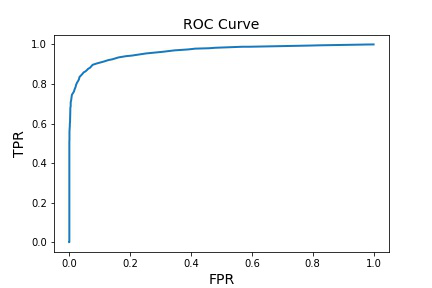

In [6]:
vgg2_fp, vgg2_fp_issame = get_val_pair(conf.emore_folder, 'vgg2_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

agedb_30 - accuray:0.9346666666666665, threshold:1.6200000000000003


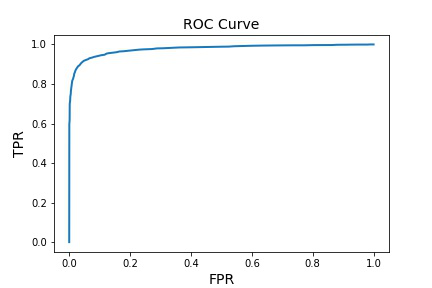

In [7]:
agedb_30, agedb_30_issame = get_val_pair(conf.emore_folder, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, agedb_30, agedb_30_issame, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

calfw - accuray:0.9401666666666667, threshold:1.5299999999999998


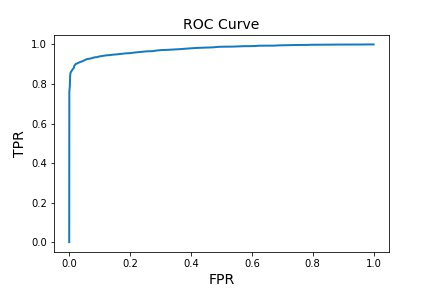

In [9]:
calfw, calfw_issame = get_val_pair(conf.emore_folder, 'calfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, calfw, calfw_issame, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

cfp_ff - accuray:0.9891428571428573, threshold:1.498


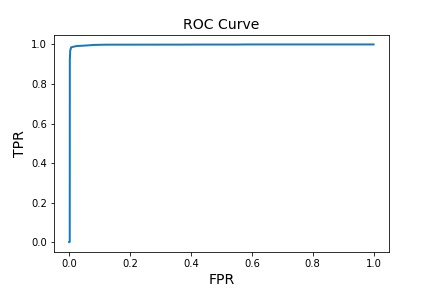

In [10]:
cfp_ff, cfp_ff_issame = get_val_pair(conf.emore_folder, 'cfp_ff')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_ff, cfp_ff_issame, nrof_folds=10, tta=True)
print('cfp_ff - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

cfp_fp - accuray:0.8985714285714284, threshold:1.719


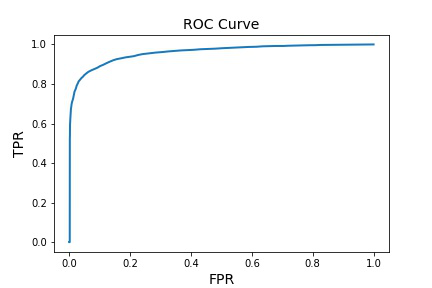

In [11]:
cfp_fp, cfp_fp_issame = get_val_pair(conf.emore_folder, 'cfp_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_fp, cfp_fp_issame, nrof_folds=10, tta=True)
print('cfp_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

cplfw - accuray:0.866, threshold:1.67


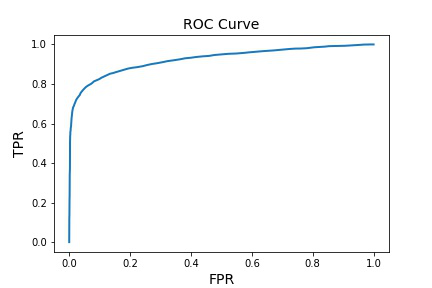

In [12]:
cplfw, cplfw_issame = get_val_pair(conf.emore_folder, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cplfw, cplfw_issame, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

lfw - accuray:0.9918333333333333, threshold:1.521


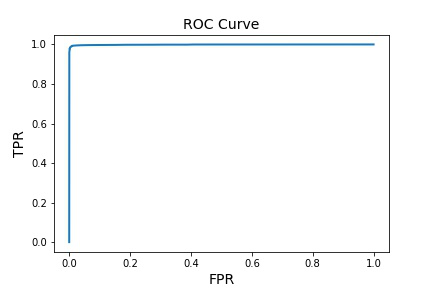

In [8]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

In [5]:
# 上面使用mobilenet模型  下面使用Resnet50 模型
conf.use_mobilfacenet = False

In [6]:
learner = face_learner(conf, inference=True)

{'data_path': PosixPath('data'), 'work_path': PosixPath('work_space'), 'model_path': PosixPath('work_space/models'), 'log_path': PosixPath('work_space/log'), 'save_path': PosixPath('work_space/save'), 'input_size': [112, 112], 'embedding_size': 512, 'use_mobilfacenet': True, 'net_depth': 50, 'drop_ratio': 0.6, 'net_mode': 'ir_se', 'device': device(type='cuda', index=0), 'test_transform': Compose(
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
), 'data_mode': 'emore', 'vgg_folder': PosixPath('data/faces_vgg_112x112'), 'ms1m_folder': PosixPath('data/faces_ms1m_112x112'), 'emore_folder': PosixPath('data/faces_emore'), 'batch_size': 100, 'facebank_path': PosixPath('data/facebank'), 'threshold': 1.5, 'face_limit': 10, 'min_face_size': 30}
MobileFaceNet model generated


In [7]:
learner.load_state(conf, 'final_resnet50.pth', True, True)

vgg2_fp - accuray:0.9100000000000001, threshold:1.75


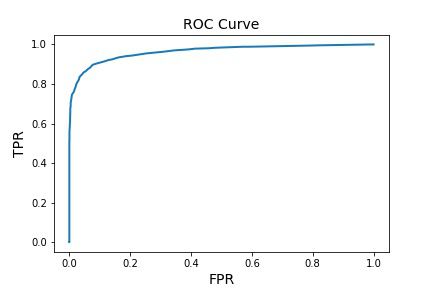

In [8]:
vgg2_fp, vgg2_fp_issame = get_val_pair(conf.emore_folder, 'vgg2_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, vgg2_fp, vgg2_fp_issame, nrof_folds=10, tta=True)
print('vgg2_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

agedb_30 - accuray:0.9346666666666665, threshold:1.6200000000000003


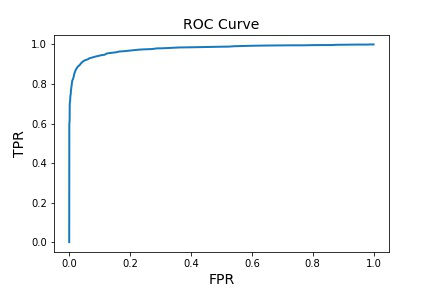

In [9]:
agedb_30, agedb_30_issame = get_val_pair(conf.emore_folder, 'agedb_30')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, agedb_30, agedb_30_issame, nrof_folds=10, tta=True)
print('agedb_30 - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

calfw - accuray:0.9401666666666667, threshold:1.5299999999999998


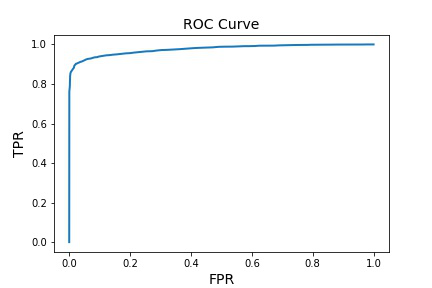

In [10]:
calfw, calfw_issame = get_val_pair(conf.emore_folder, 'calfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, calfw, calfw_issame, nrof_folds=10, tta=True)
print('calfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

cfp_ff - accuray:0.9891428571428573, threshold:1.498


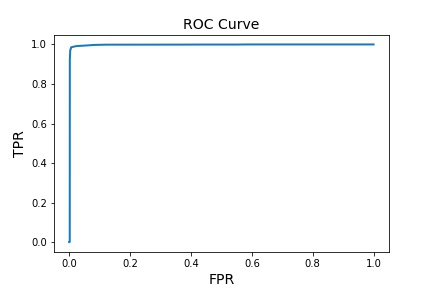

In [11]:
cfp_ff, cfp_ff_issame = get_val_pair(conf.emore_folder, 'cfp_ff')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_ff, cfp_ff_issame, nrof_folds=10, tta=True)
print('cfp_ff - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

cfp_fp - accuray:0.8985714285714284, threshold:1.719


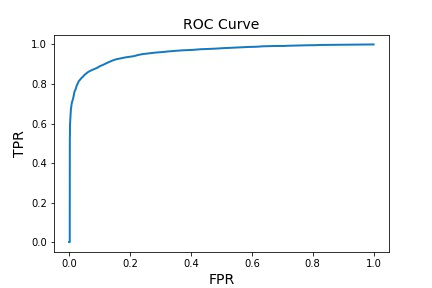

In [12]:
cfp_fp, cfp_fp_issame = get_val_pair(conf.emore_folder, 'cfp_fp')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cfp_fp, cfp_fp_issame, nrof_folds=10, tta=True)
print('cfp_fp - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

cplfw - accuray:0.866, threshold:1.67


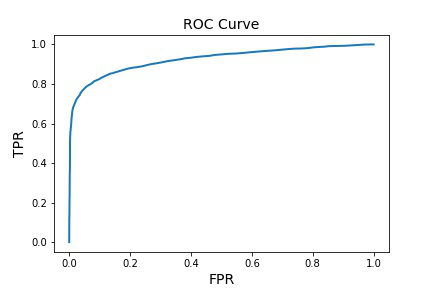

In [13]:
cplfw, cplfw_issame = get_val_pair(conf.emore_folder, 'cplfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, cplfw, cplfw_issame, nrof_folds=10, tta=True)
print('cplfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)

lfw - accuray:0.9918333333333333, threshold:1.521


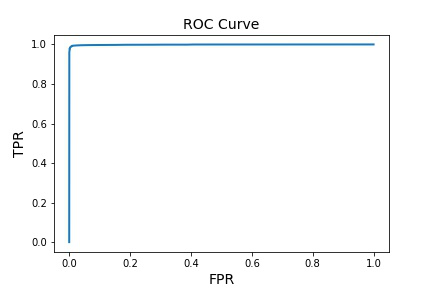

In [14]:
lfw, lfw_issame = get_val_pair(conf.emore_folder, 'lfw')
accuracy, best_threshold, roc_curve_tensor = learner.evaluate(conf, lfw, lfw_issame, nrof_folds=10, tta=True)
print('lfw - accuray:{}, threshold:{}'.format(accuracy, best_threshold))
trans.ToPILImage()(roc_curve_tensor)